### MIDST Antibiotics Time Machine Hands-On Session

In [1]:
from ABR import *

def printStatistics(solution):
    print("Optimal Value:", solution["optVal"])
    print("Elapsed Time:", solution["elapsedTime"])
    print("Branch and Bound Node Count:", solution["bbNode"])
    print("Evaluator Value:",solution["EvaVal"])

In [2]:
dataset = "msx255_SuppData2017_GRME_ABR.xlsx"
TMInstance = TimeMachine(data = dataset)
TimeLimit = 3600

In [3]:
initialState = [1,1,1,1]
targetState = [0,0,0,0]
matrixType = "epm"
n = 4
solutionMethod = "DP" # DP, Multistage, Strong2stage, Weak2stage
matrixSamplingSize = 10000

In [4]:
T_matrices_optimization = TMInstance.GenerateMatrix(matrixType,
                                                    useCase = "optimization",
                                                    matrixSamplingSize = matrixSamplingSize)

T_matrices_evaluator = TMInstance.GenerateMatrix(matrixType,
                                                useCase = "evaluator",
                                                matrixSamplingSize = matrixSamplingSize)

Returning Matrix_useCase=optimization_type=epm_s=10000 from existing file.
Returning Matrix_useCase=evaluator_type=epm_s=10000 from existing file.


### Drawing Antibiotics

In [5]:
TMInstance.extracted_antibiotics

{0: 'AM 256 rr2',
 1: 'AM 512 rr1',
 2: 'AMC 8_8 rr1',
 3: 'CAZ 0.25 rr2',
 4: 'CAZ 0.5 rr2',
 5: 'CAZ 0.125 rr2',
 6: 'CEC 4 rr2',
 7: 'CPR 8 rr2',
 8: 'CPR 12 rr2',
 9: 'CPR 16 rr2',
 10: 'CRO 0.025 rr2',
 11: 'CRO 0.05 rr2',
 12: 'CRO 0.1 rr2',
 13: 'CXM 4 rr2',
 14: 'CXM 3 rr2',
 15: 'CXM 2.25 rr2',
 16: 'FEP 0.125 rr2',
 17: 'FEP 0.0625 rr2',
 18: 'FEP 0.0312 rr2',
 19: 'TZP 8_128 rr2',
 20: 'TZP 8_64 rr2',
 21: 'TZP 8_32 rr2',
 22: 'ZOX 0.0156 rr2'}

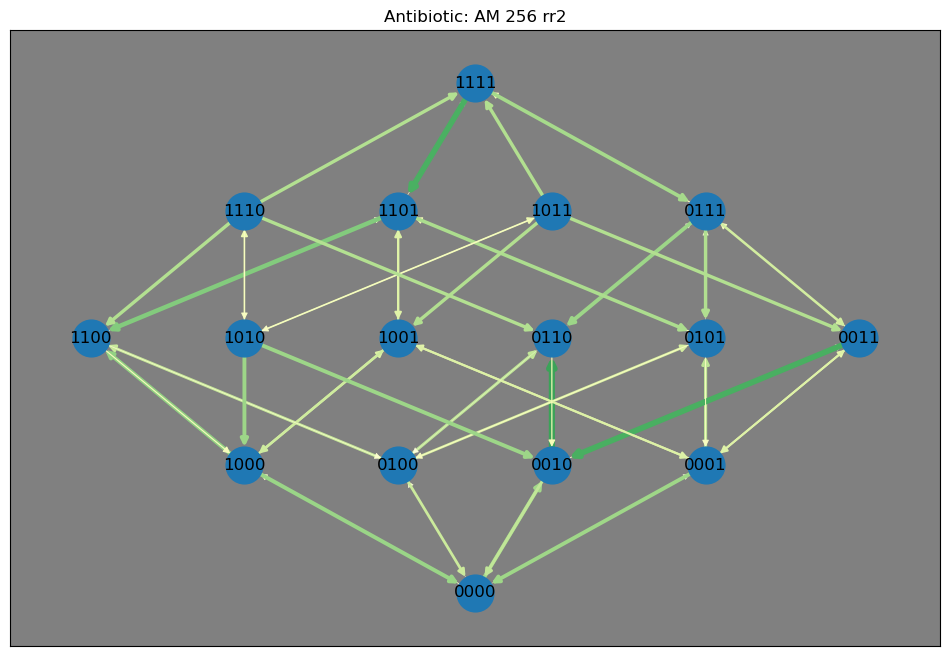

In [6]:
antibioticID = 0
antibioticName = TMInstance.extracted_antibiotics[antibioticID]
T_matrix = T_matrices_optimization[antibioticID + 1]
TMInstance.DrawT_Matrix(T_matrix,f"Antibiotic: {antibioticName}")

In [7]:
solution = TMInstance.Solve(initialState, n, targetState, solutionMethod,
                                    matrixType, T_matrices_optimization,
                                    T_matrices_evaluator, TimeLimit)

Saved N4_1111-0000_DP_epm_plot.png under c:\Projects\StochasticAntibiotic\Data\Solutions.
Optimal Value: 0.483
Elapsed Time: 0
Branch and Bound Node Count: 0
Evaluator Value: 0.484


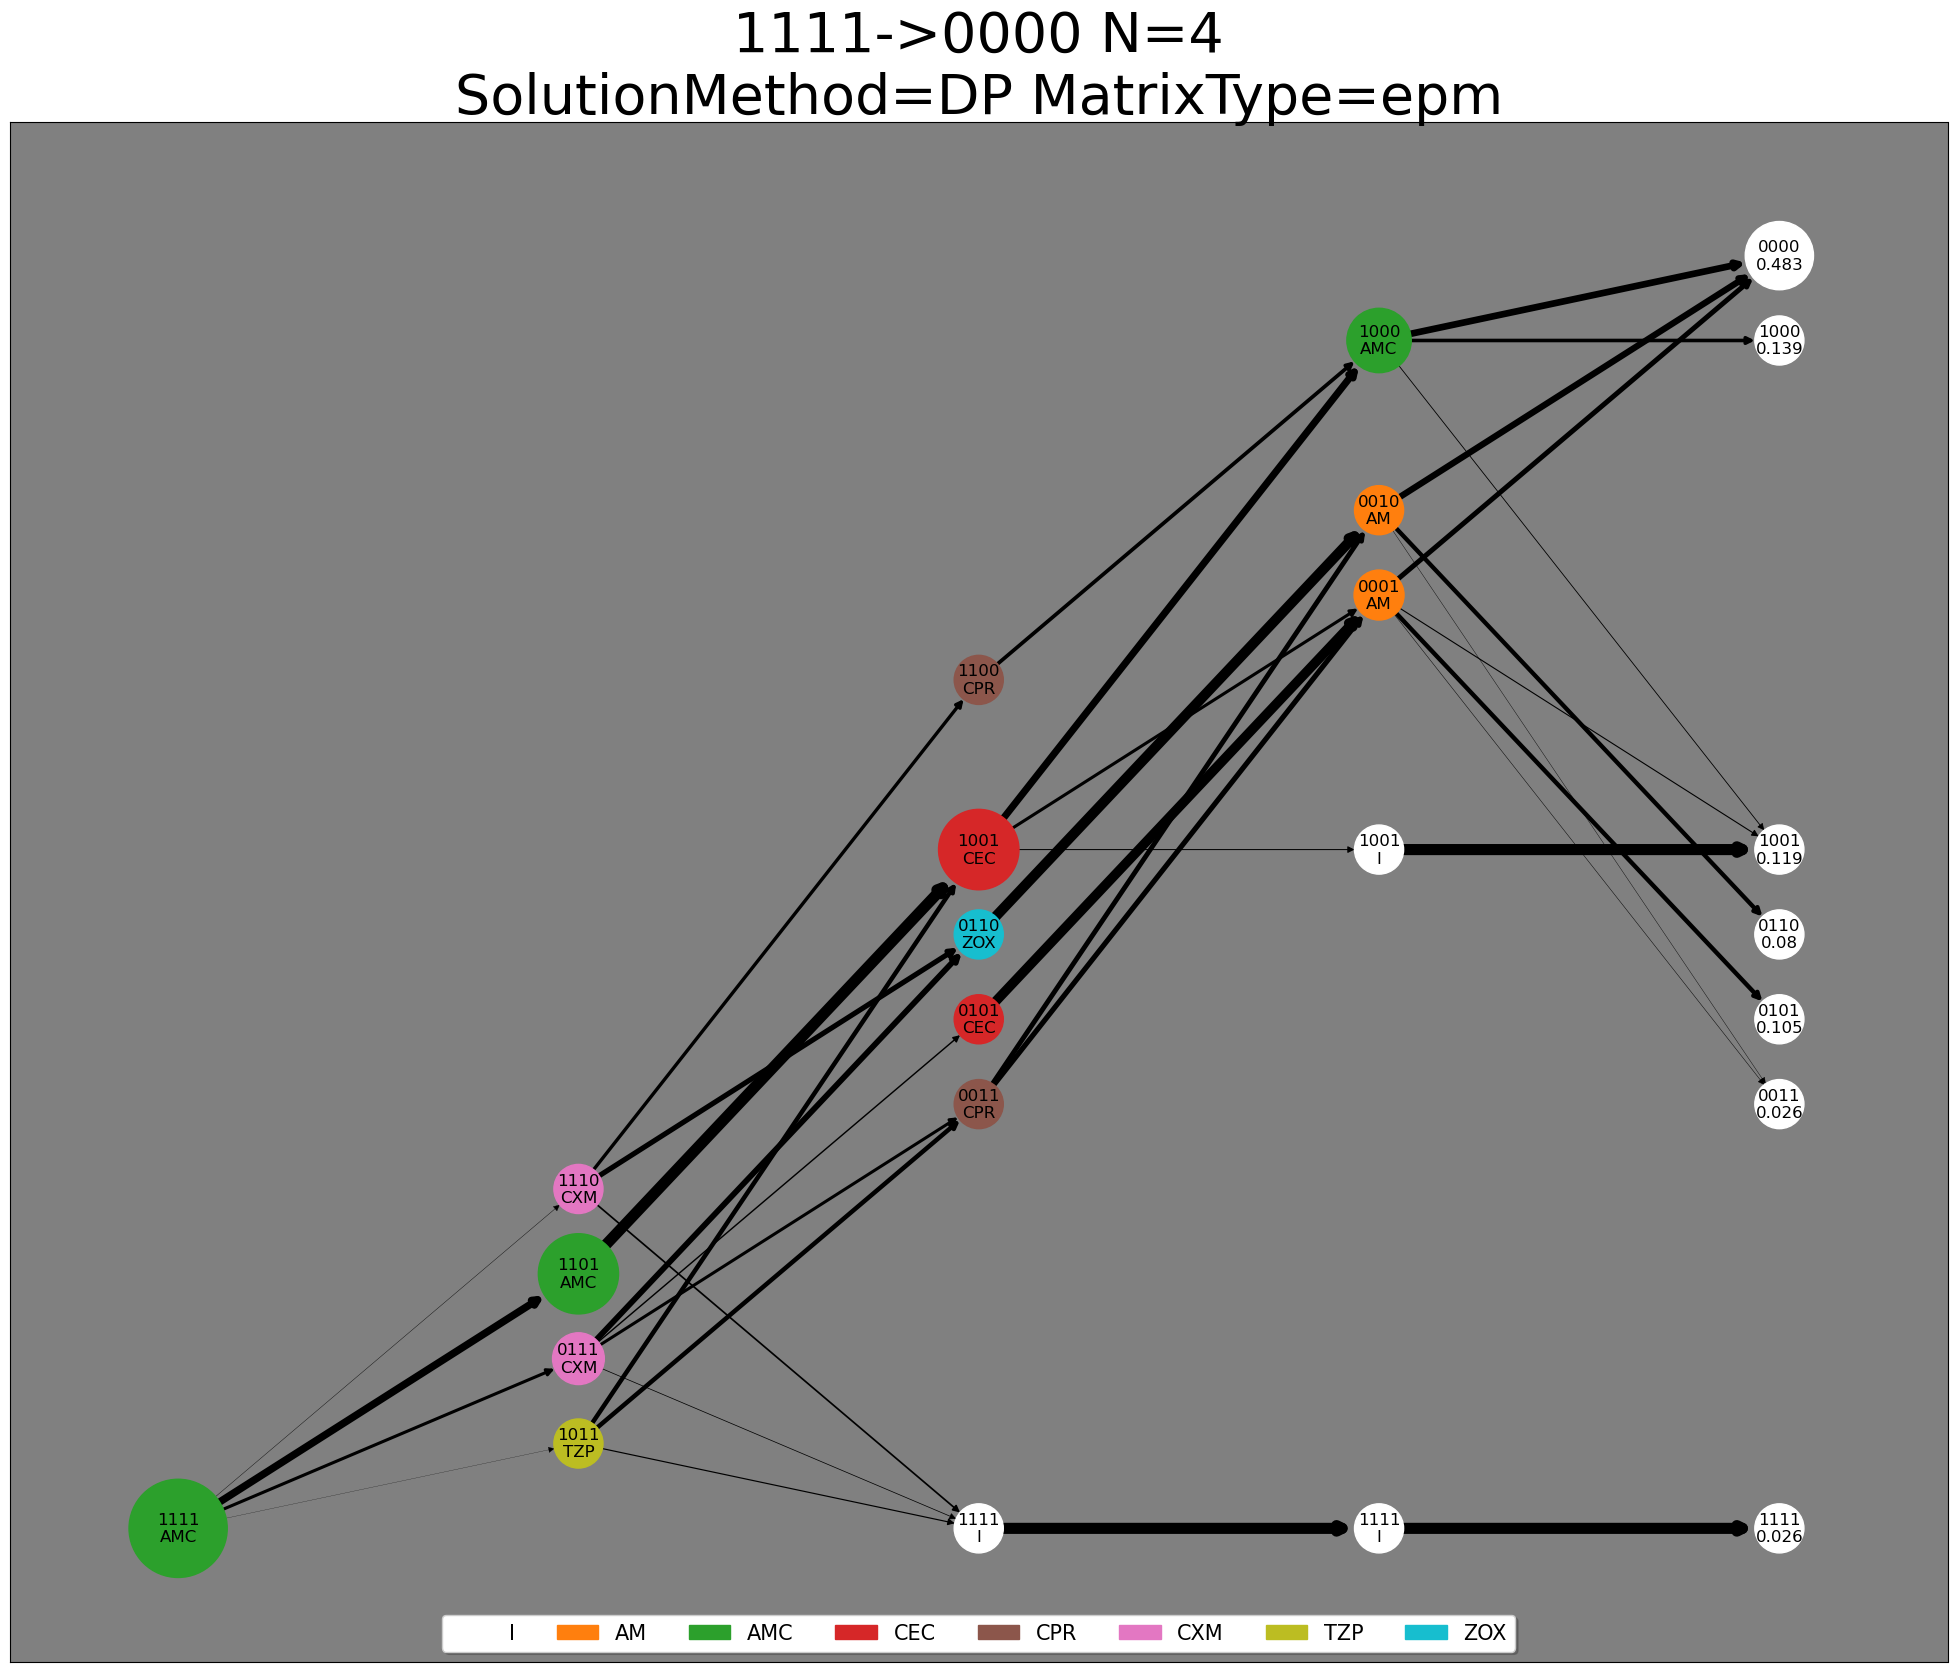

In [8]:
TMInstance.PlotSolution(solution=solution,
                        solutionMethod = solutionMethod,
                        T_matrices=T_matrices_optimization, 
                        N=n,
                        initialState=initialState,
                        matrixType = matrixType,
                        final=targetState)
printStatistics(solution)

### Demo with Custom Data
- force_refresh parameter should always be true.


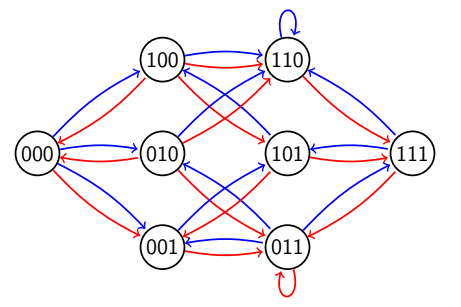

In [9]:
dataset = "Demo.xlsx"
TMInstance = TimeMachine(data = dataset)
TimeLimit = 3600
initialState = [1,1,1]
targetState = [0,0,0]
matrixType = "epm"
n = 8
solutionMethod = "DP"

T_matrices_optimization = TMInstance.GenerateMatrix(matrixType,useCase = "optimization",
                                                    matrixSamplingSize = 5, force_refresh = True)

T_matrices_evaluator = TMInstance.GenerateMatrix(matrixType,useCase = "evaluator",
                                                    matrixSamplingSize = 5, force_refresh = True)


In [10]:
TMInstance.extracted_antibiotics

{0: 'Red', 1: 'Blue'}

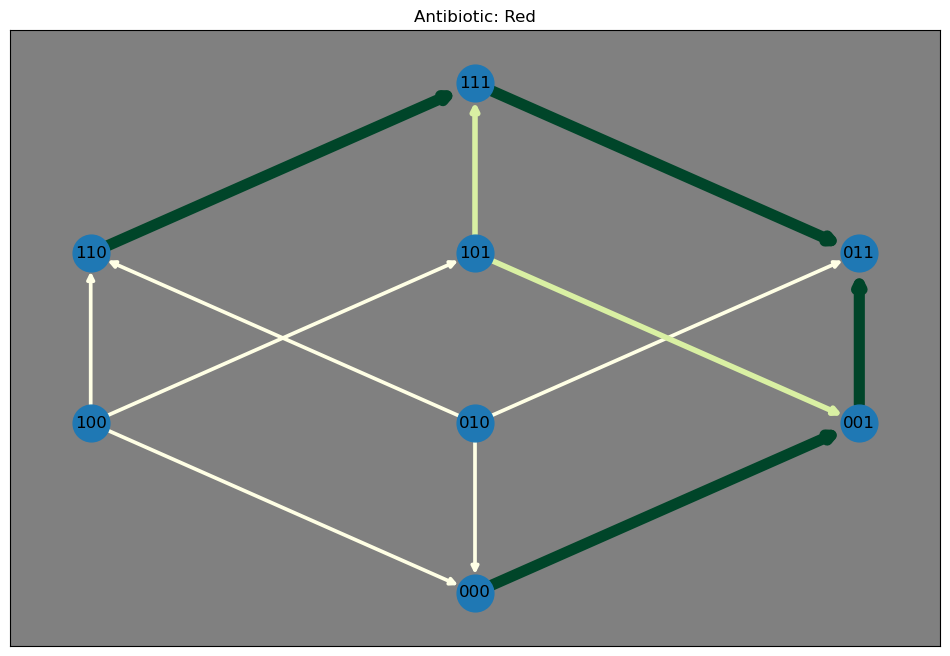

In [11]:
antibioticID = 0
antibioticName = TMInstance.extracted_antibiotics[antibioticID]
T_matrix = T_matrices_optimization[antibioticID + 1]
TMInstance.DrawT_Matrix(T_matrix,f"Antibiotic: {antibioticName}")


Saved N8_111-000_DP_epm_plot.png under c:\Projects\StochasticAntibiotic\Data\Solutions.
Optimal Value: 0.421
Elapsed Time: 0
Branch and Bound Node Count: 0
Evaluator Value: 0.421


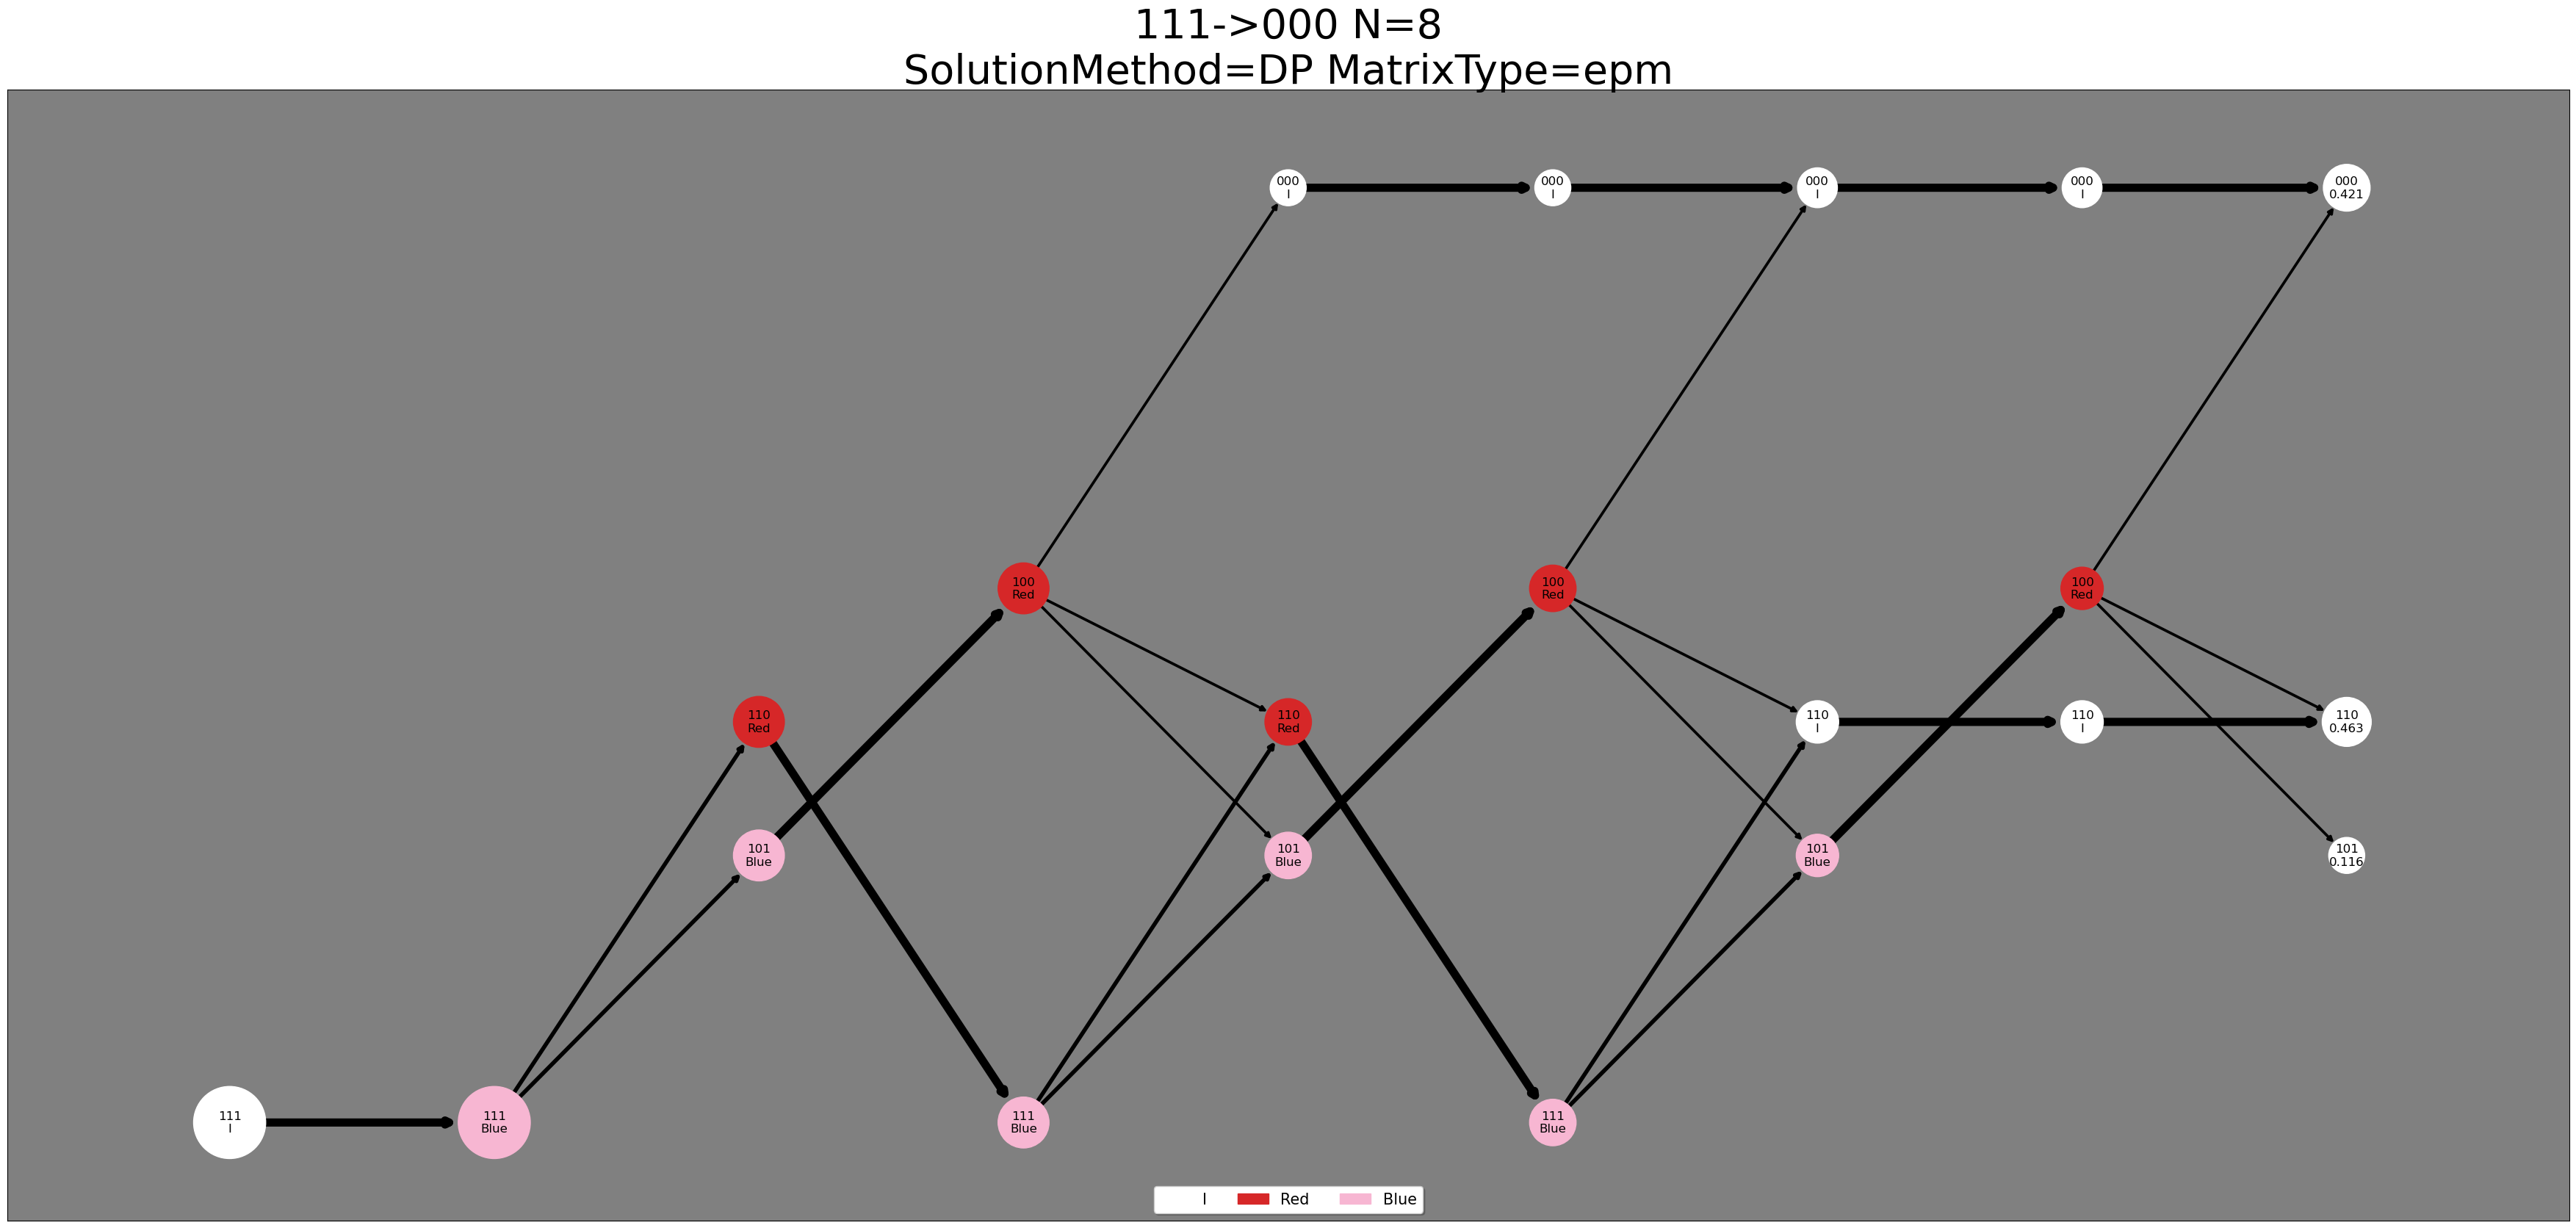

In [12]:
solution = TMInstance.Solve(initialState, n, targetState, solutionMethod,
                                    matrixType, T_matrices_optimization,
                                    T_matrices_evaluator, TimeLimit)
TMInstance.PlotSolution(solution=solution,
                        solutionMethod = solutionMethod,
                        T_matrices=T_matrices_optimization, 
                        N=n,
                        initialState=initialState,
                        matrixType = matrixType,
                        final=targetState)
printStatistics(solution)